
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.



In [5]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

(120, 2)


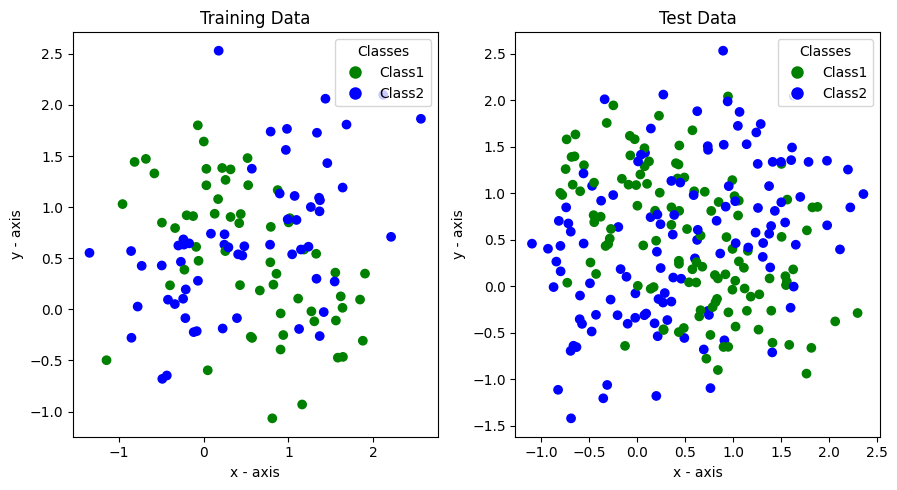

In [ ]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1= [0, 0]
mean2= [0, 1]
mean3= [1, 0]
mean4= [1, 1]
cov= [[0.3, 0], [0, 0.3]]


#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
sample1 = np.random.multivariate_normal(mean1, cov, 90)
sample2 = np.random.multivariate_normal(mean2, cov, 90)
sample3 = np.random.multivariate_normal(mean3, cov, 90)
sample4 = np.random.multivariate_normal(mean4, cov, 90)


#Generate training data

training_data1 = sample1[:30]
training_data2 = sample2[:30]
training_data3 = sample3[:30]
training_data4 = sample4[:30]

label1 = 1
label2 = -1

X_train = np.vstack((training_data1, training_data2, training_data3, training_data4))
print((X_train.shape))

Y_train = [1 if ((x in training_data1) or (x in training_data4)) else -1 for x in X_train]
Y_train = np.array(Y_train)


#Generate testing data

testing_data1 = np.array([item for item in sample1 if item not in training_data1])
testing_data2 = np.array([item for item in sample2 if item not in training_data2])
testing_data3 = np.array([item for item in sample3 if item not in training_data3])
testing_data4 = np.array([item for item in sample4 if item not in training_data4])

X_test = np.vstack((testing_data1, testing_data2, testing_data3, testing_data4))

Y_test = [1 if (x in testing_data1 or x in testing_data4) else -1 for x in X_test]



#Visualize the data using plt.scatter() function

color_map = {1: 'green', -1: 'blue'}
fig, axs = plt.subplots(1, 2, figsize=(9, 5))

# plt.subplot(1,2,1)
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=ListedColormap(['green', 'blue']))
handles_train = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axs[0].set_title('Training Data')
axs[0].legend(handles=handles_train, loc='upper right', labels = ['Class1', 'Class2'], title='Classes')
axs[0].set_xlabel('x - axis')
axs[0].set_ylabel('y - axis')


# plt.subplot(1,2,2)
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=ListedColormap(['green', 'blue']))
handles_train = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for label, color in color_map.items()]
axs[1].set_title('Test Data')
axs[1].legend(handles=handles_train, loc='upper right', labels = ['Class1', 'Class2'], title='Classes')
axs[1].set_xlabel('x - axis')
axs[1].set_ylabel('y - axis')

plt.tight_layout()
plt.show()



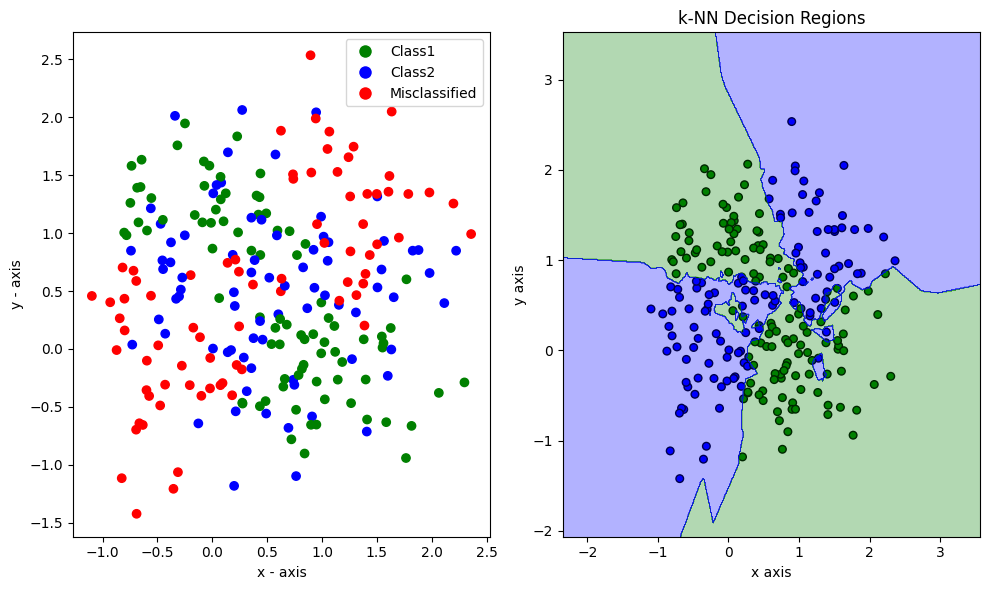

In [ ]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code

  y_pred = []

  for x_test in X_test:

    distances = []
    k_NN_indices = []
    for x_train in X_train:

      dist = math.sqrt((x_train[0]-x_test[0])**2 + (x_train[1] - x_test[1])**2)
      distances.append(dist)

    k_NN_indices = np.argsort(distances)[:k]

    frequency = 0
    for index in k_NN_indices:
      if Y_train[index] == label1:
        frequency += 1
      else:
        frequency -= 1

    if frequency > 0:
      y_pred.append(label1)
    else:
      y_pred.append(label2)

  return y_pred

# print(kNNClassify(X_train,Y_train,X_test,10))

#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code

  accuracy = 0
  for i in range(len(pred)):
    if pred[i] == true[i]:
      accuracy += 1

  accuracy /= len(pred)
  return accuracy


# print(KNNAccuracy(Y_test, kNNClassify(X_train,Y_train,X_test,10)))

#Create a visual representation of predictions

Y_pred = kNNClassify(X_train,Y_train,X_test,5)
labels = []   ## 1 for class1, -1 for class2 and 0 if misclassified

for index in range(len(Y_pred)):
  if Y_pred[index] != Y_test[index]:
    labels.append(0)
  else:
    labels.append(Y_pred[index])

plt.subplots(1, 2, figsize=(10,6))

color_map = {1: 'green', -1: 'blue', 0: 'red'}
# plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels, cmap=ListedColormap(['green', 'blue', 'red']))
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for label, color in color_map.items()]

plt.legend(handles=handles, loc='upper right', labels = ['Class1', 'Class2', 'Misclassified'])
plt.xlabel('x - axis')
plt.ylabel('y - axis')



#Generate and visualize the decision regions and overlay the test points
plt.subplot(1,2,2)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


input_arr = np.array([xx.ravel(), yy.ravel()]).T

plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, cmap=ListedColormap(['green', 'blue']), edgecolors='k', s=30)
y_pred = kNNClassify(X_train,Y_train,input_arr,5)
plt.contourf(xx, yy, np.array(y_pred).reshape(xx.shape), alpha=0.3, cmap=ListedColormap(['green', 'blue']))

plt.title('k-NN Decision Regions')
plt.xlabel('x axis')
plt.ylabel('y axis')

plt.tight_layout()
plt.show()

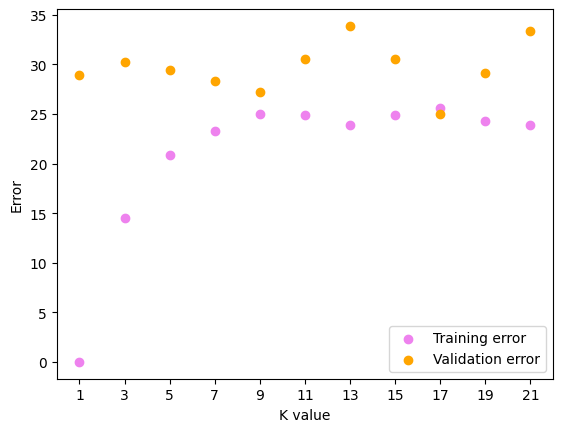

The best value of k = 17


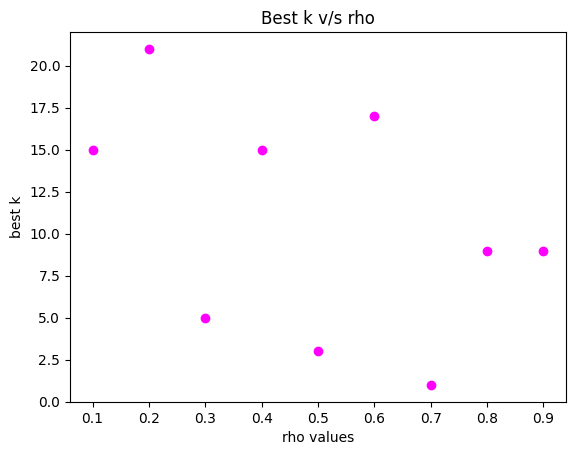

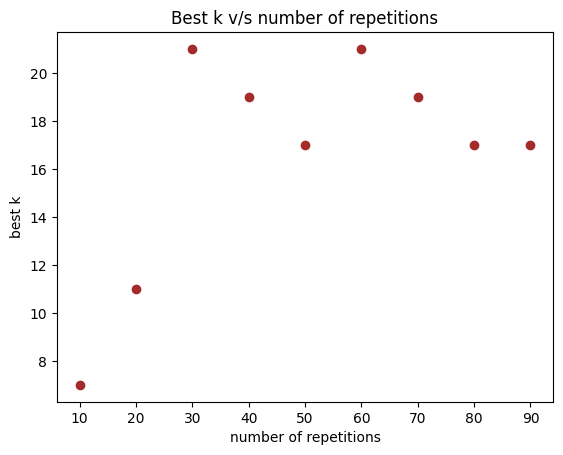

Performance for best k, i.e., k = 17: 67.91666666666667%
There is an improvement on the classification error over the result of Part 2 for the same value of k(best k)


In [ ]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho):
  #Iterate through range of k values
    #Iterate through number of repetations
      #Hold out rho fraction of training data in each repetition.
  x = X_train.tolist()
  acc_score_train = np.zeros(len(k_range))
  acc_score_val = np.zeros(len(k_range))
  val_ind = 36

  for k_ind in range(len(k_range)):
    for i in range(numrep):
      og_set = list(zip(x, Y_train))
      random.shuffle(og_set)

      val_set = np.array(og_set[:val_ind], dtype = object)

      train_set = np.array(og_set[val_ind:], dtype = object)

      y_pred = kNNClassify(np.array(train_set[:, 0]), np.array(train_set[:, 1]), np.array(val_set[:, 0]), k_range[k_ind])
      acc_score_val[k_ind] += KNNAccuracy(val_set[:, 1], y_pred)
      y_pred = kNNClassify(np.array(train_set[:, 0]), np.array(train_set[:, 1]), np.array(train_set[:, 0]), k_range[k_ind])
      acc_score_train[k_ind] += KNNAccuracy(np.array(train_set[:, 1]), y_pred)

  acc_score_train = acc_score_train/numrep
  acc_score_val = acc_score_val/numrep

  #Return errors on training and validation data
  return acc_score_train, acc_score_val

# holdoutCVkNN([x for x in range(1, 22, 2)], 10, 0.3)

# plt.subplots(1, 3, figsize=(10, 5))
#Plot training and validation errors for different values of k

# plt.subplot(1,3,1)

k_values = [x for x in range(1, 22, 2)]
train_error, val_error =  holdoutCVkNN(k_values, 10, 0.3)

train_error = [(1-x)*100 for x in train_error]
val_error = [(1-x)*100 for x in val_error]

plt.scatter(k_values, train_error, color = 'violet', label = 'Training error')
plt.scatter(k_values, val_error, color = 'orange', label = 'Validation error')
plt.xticks(k_values)
plt.xlabel('K value')
plt.ylabel('Error')
plt.legend(loc = 'lower right')

plt.show()
#what is the best value for k?

## The best value of k is where validation error is minimum
best_k = k_values[val_error.index(min(val_error))]
error_best_k = min(val_error)
print(f'The best value of k = {best_k}')



#Effect of rho and number repetations on k

# Effect of rho
# plt.subplot(1,3,2)

rho_list = [x/10 for x in range(1, 10)]
optimum_k = []
for rho in rho_list:
  error_training, error_val = holdoutCVkNN(k_values, 10, rho)
  error_training = [(1-x)*100 for x in error_training]
  error_val = [(1-x)*100 for x in error_val]

  optimum_k.append(k_values[error_val.index(min(error_val))])

plt.scatter(rho_list, optimum_k, color = 'magenta')

plt.xticks(rho_list)
plt.xlabel('rho values')
plt.ylabel('best k')
plt.title('Best k v/s rho')

plt.show()
# Effect of number of repetitions
# plt.subplot(1,3,3)

num_rep = [x for x in range(10, 100, 10)]
optimum_k = []
for rep in num_rep:
  error_training, error_val = holdoutCVkNN(k_values, rep, 0.3)
  error_training = [(1-x)*100 for x in error_training]
  error_val = [(1-x)*100 for x in error_val]

  optimum_k.append(k_values[error_val.index(min(error_val))])

plt.scatter(num_rep, optimum_k, color = 'brown')

plt.xticks(num_rep)
plt.xlabel('number of repetitions')
plt.ylabel('best k')
plt.title('Best k v/s number of repetitions')

plt.show()




#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
Y_predicted = kNNClassify(X_train,Y_train,X_test,best_k)

performance = KNNAccuracy(Y_test, Y_predicted)

print(f'Performance for best k, i.e., k = {best_k}: {performance*100}%')

if error_best_k > 1-performance:
  print('There is an improvement on the classification error over the result of Part 2 for the same value of k(best k)')
else:
  print('There is no improvement on the classification error over the result of Part 2 for the same value of k(best k)')




Performance of k-NN classifier = 63.0%
Performance of k-NN classifier = 67.875%
Performance of k-NN classifier = 69.66666666666667%
Performance of k-NN classifier = 70.625%
Performance of k-NN classifier = 68.55%
Performance of k-NN classifier = 69.33333333333334%
Performance of k-NN classifier = 68.78571428571428%
Performance of k-NN classifier = 69.78125%
Performance of k-NN classifier = 69.63888888888889%
Performance of k-NN classifier = 69.75%
Performance of k-NN classifier = 67.22727272727272%
Performance of k-NN classifier = 69.52083333333333%
Performance of k-NN classifier = 70.63461538461539%
Performance of k-NN classifier = 69.05357142857143%
Performance of k-NN classifier = 69.69999999999999%
Performance of k-NN classifier = 68.234375%
Performance of k-NN classifier = 69.61764705882352%
Performance of k-NN classifier = 69.1388888888889%
Performance of k-NN classifier = 68.57894736842105%
Performance of k-NN classifier = 69.375%


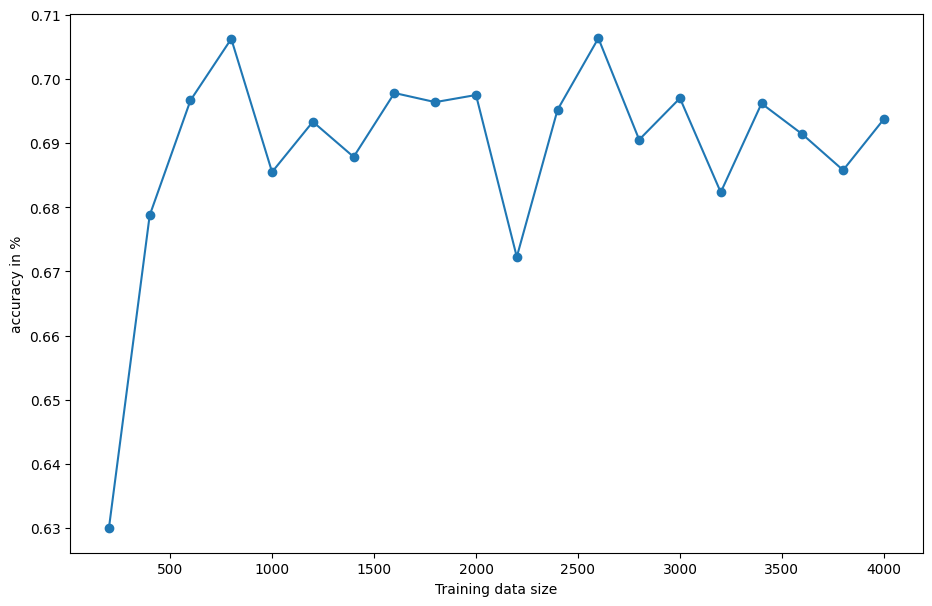

In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases

performance = np.zeros(20)

for n in range(200, 4001, 200):

  train_sz = int(n/4)

  new_sample1 = np.random.multivariate_normal(mean1, cov, train_sz*3)
  new_sample2 = np.random.multivariate_normal(mean2, cov, train_sz*3)
  new_sample3 = np.random.multivariate_normal(mean3, cov, train_sz*3)
  new_sample4 = np.random.multivariate_normal(mean4, cov, train_sz*3)

  new_training_data1 = new_sample1[:train_sz]
  new_training_data2 = new_sample2[:train_sz]
  new_training_data3 = new_sample3[:train_sz]
  new_training_data4 = new_sample4[:train_sz]

  new_X_train = np.vstack((new_training_data1, new_training_data2, new_training_data3, new_training_data4))

  new_Y_train = [1 if ((x in new_training_data1) or (x in new_training_data4)) else -1 for x in new_X_train]
  new_Y_train = np.array(new_Y_train)

  new_testing_data1 = np.array([item for item in new_sample1 if item not in new_training_data1])
  new_testing_data2 = np.array([item for item in new_sample2 if item not in new_training_data2])
  new_testing_data3 = np.array([item for item in new_sample3 if item not in new_training_data3])
  new_testing_data4 = np.array([item for item in new_sample4 if item not in new_training_data4])

  new_X_test = np.vstack((new_testing_data1, new_testing_data2, new_testing_data3, new_testing_data4))

  new_Y_test = [1 if (x in new_testing_data1 or x in new_testing_data4) else -1 for x in new_X_test]

  # print("n = ", n, len(new_X_test), len(new_X_train), len(new_Y_test), len(new_Y_train))
  performance[int(n/200 - 1)] = KNNAccuracy(new_Y_test, kNNClassify(new_X_train, new_Y_train, new_X_test, best_k))

for i in range(20):
  print(f'Performance of k-NN classifier = {performance[i]*100}%')

plt.figure(figsize = (11, 7))
plt.plot([x for x in range(200, 4001, 200)], performance, label = 'Line Graph', marker='o', linestyle='-')
plt.xlabel('Training data size')
plt.ylabel('accuracy in %')
# plt.yticks(np.arange(10, 110, 10))

plt.show()


#Experiments with more difficult data set.

n_mean1= [0, 0]
n_mean2= [0, 1]
n_mean3= [1, 0]
n_mean4= [1, 1]
n_cov= [[0.6, 0], [0, 0.6]]


#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
n_sample1 = np.random.multivariate_normal(mean1, cov, 90)
n_sample2 = np.random.multivariate_normal(mean2, cov, 90)
n_sample3 = np.random.multivariate_normal(mean3, cov, 90)
n_sample4 = np.random.multivariate_normal(mean4, cov, 90)


#Generate training data

n_training_data1 = n_sample1[:30]
n_training_data2 = n_sample2[:30]
n_training_data3 = n_sample3[:30]
n_training_data4 = n_sample4[:30]

n_X_train = np.vstack((n_training_data1, n_training_data2, n_training_data3, n_training_data4))

n_Y_train = [1 if ((x in n_training_data1) or (x in n_training_data4)) else -1 for x in n_X_train]
n_Y_train = np.array(n_Y_train)


#Generate testing data

n_testing_data1 = np.array([item for item in n_sample1 if item not in n_training_data1])
n_testing_data2 = np.array([item for item in n_sample2 if item not in n_training_data2])
n_testing_data3 = np.array([item for item in n_sample3 if item not in n_training_data3])
n_testing_data4 = np.array([item for item in n_sample4 if item not in n_training_data4])

n_X_test = np.vstack((n_testing_data1, n_testing_data2, n_testing_data3, n_testing_data4))

n_Y_test = [1 if (x in n_testing_data1 or x in n_testing_data4) else -1 for x in n_X_test]






For order = 1, accuracy = 62.083333333333336%
For order = 2, accuracy = 64.16666666666667%
For order = 3, accuracy = 63.33333333333333%
For order = inf, accuracy = 64.16666666666667%


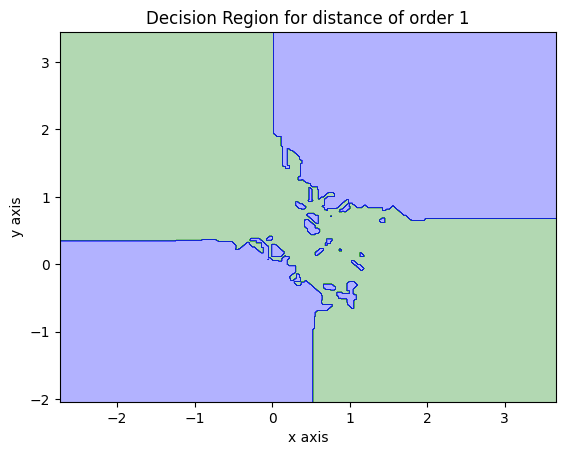

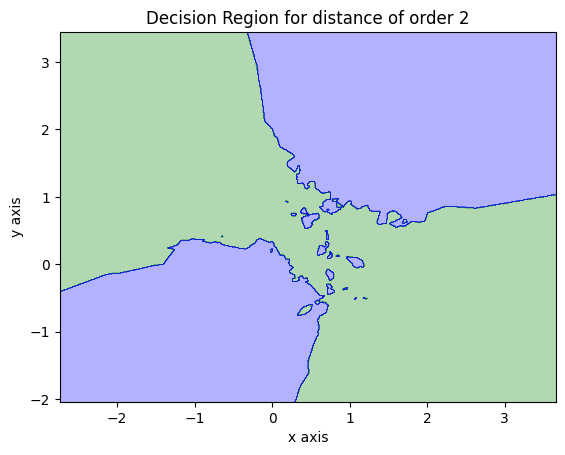

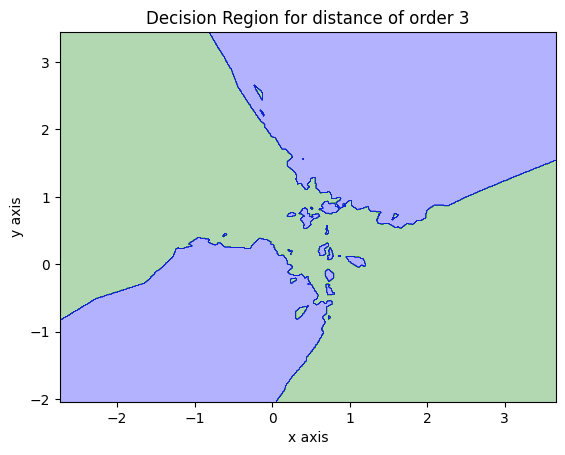

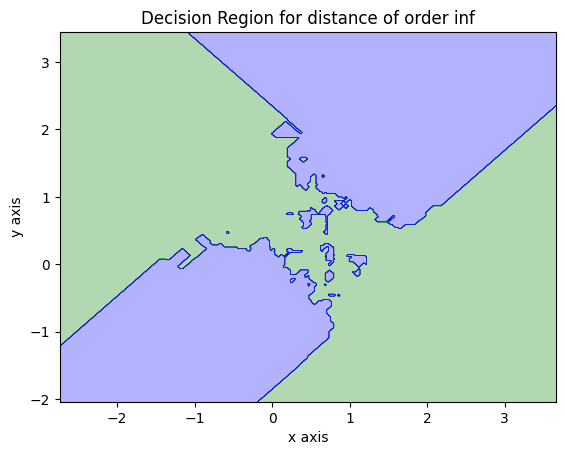

In [ ]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures
norm_order = [1,2,3,np.inf]
def kNNClassify_p(X_train,Y_train,X_test,k,p):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  y_pred = []

  for x_test in X_test:

    distances = []
    k_NN_indices = []
    for x_train in X_train:

      dist = np.linalg.norm(x_test-x_train, ord = p)
      distances.append(dist)

    k_NN_indices = np.argsort(distances)[:k]

    frequency = 0
    for index in k_NN_indices:
      if Y_train[index] == label1:
        frequency += 1
      else:
        frequency -= 1

    if frequency > 0:
      y_pred.append(label1)
    else:
      y_pred.append(label2)

  return y_pred

for order in norm_order:
  print(f'For order = {order}, accuracy = {KNNAccuracy(Y_test, kNNClassify_p(X_train,Y_train,X_test,10,order))*100}%')



#Understand the decision regions of KNN classifier with different distance measures
# plt.subplots(4,1,figsize=(4,6))
for order in norm_order:

  # if order == np.inf:
  #   plt.subplot(4,1,4)
  # else:
  #   plt.subplot(4,1,order)
  
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  input_arr = np.array([xx.ravel(), yy.ravel()]).T

  # plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=ListedColormap(['green', 'blue']), edgecolors='k', s=30)
  y_pred = kNNClassify_p(X_train,Y_train,input_arr,10,order)
  plt.contourf(xx, yy, np.array(y_pred).reshape(xx.shape), alpha=0.3, cmap=ListedColormap(['green', 'blue']))

  plt.title(f'Decision Region for distance of order {order}')
  plt.xlabel('x axis')
  plt.ylabel('y axis')
  plt.show()

# plt.tight_layout()





c:\Python312\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


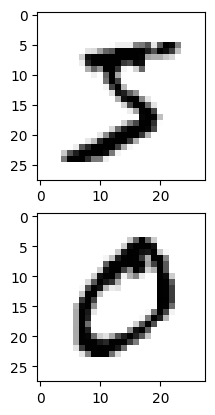

In [10]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')







In [18]:
# Create train, validation, and test splits
set_digits = list(zip(images, targets))
random.shuffle(set_digits)

unit_train = int(0.1 * len(set_digits))
set_train_images, set_train_targets = zip(*set_digits[:8 * unit_train])
set_valid_images, set_valid_targets = zip(*set_digits[8 * unit_train:9 * unit_train])
set_test_images, set_test_targets = zip(*set_digits[9 * unit_train:])

# Convert to NumPy arrays
set_train_images = np.array(set_train_images)
set_train_targets = np.array(set_train_targets)
set_valid_images = np.array(set_valid_images)
set_valid_targets = np.array(set_valid_targets)
set_test_images = np.array(set_test_images)
set_test_targets = np.array(set_test_targets)


<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data

4.

In [20]:
#Write 'MultiClassKNNClassify' function

classes = list(range(10))

def MultiClassKNNClassify(X_trained, Y_trained, X_tested, k, order):
  y_pred = []

  for x_test in X_tested:

    distances = []
    k_NN_indices = []
    for x_train in X_trained:

      # dist = math.sqrt((x_train[0]-x_test[0])**2 + (x_train[1] - x_test[1])**2)
      dist = np.linalg.norm(x_test - x_train, ord = order)
      distances.append(dist)

    k_NN_indices = np.argsort(distances)[:k]

    frequency = np.array([0]*10)
    # for index in k_NN_indices:
    #   if Y_train[index] == label1:
    #     frequency += 1
    #   else:
    #     frequency -= 1
    for index in k_NN_indices:
      for label in classes:
        if Y_trained[index] == label:
          frequency[label] += 1    

    # if frequency > 0:
    #   y_pred.append(label1)
    # else:
    #   y_pred.append(label2)
    
    max_index = np.argmax(frequency)
    y_pred.append(max_index)

    # max_value = np.max(frequency)
    # max_indices = np.where(frequency == max_value)[0]
    
    # for index in max_indices:

  return y_pred

Y_predicted_valid = MultiClassKNNClassify(set_train_images, set_train_targets, set_valid_images, 100, 2)
print(Y_predicted_valid)
performance = KNNAccuracy(set_valid_targets, Y_predicted_valid)
print(f'Performance of k-NN classifier = {performance*100}%')




[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

NameError: name 'KNNAccuracy' is not defined

In [ ]:
#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.

# for optimal k
score = np.array([0]*10)
for K in range(500, 2001, 500):
  Y_predicted_valid = MultiClassKNNClassify(set_train_images, set_train_targets, set_valid_images, K, 2)
  score.append(KNNAccuracy(set_valid_targets, Y_predicted_valid))

k_values = list(range(500, 2001, 500))
optimal_k = k_values[np.argmin(score)]

# for optimal distance
score = np.array([0]*10)
orders = [1, 2, 3, np.inf]
for order in orders:
  Y_predicted_valid = MultiClassKNNClassify(set_train_images, set_train_targets, set_valid_images, 2000, order)
  score.append(KNNAccuracy(set_valid_targets, Y_predicted_valid))

optimal_order = orders[np.argmin(score)]

#Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation

Y_predicted_test = MultiClassKNNClassify(set_train_images, set_train_targets, set_test_images, optimal_k, optimal_order)
accuracy_test = KNNAccuracy(set_test_targets, Y_predicted_test)
print(accuracy_test)

#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
  '''
  Inputs: Ground truth labels and classifier predictions
  Outputs: Confusion matrix
  '''

  conf_matrix = np.zeros((10, 10), dtype=int)

  for true_label, pred_label in zip(true, pred):
    conf_matrix[true_label][pred_label] += 1

  return conf_matrix



In [ ]:
confusion_matrix = compute_confusion_matrix(set_test_targets, Y_predicted_test)
print(confusion_matrix)

#Suggest an alternative ways to improve performance
